In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
from citipy import citipy

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | cape town
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | east london
Processing Record 4 of Set 13 | ilulissat
Processing Record 5 of Set 13 | walvis bay
Processing Record 6 of Set 13 | nanortalik
Processing Record 7 of Set 13 | rikitea
Processing Record 8 of Set 13 | carnarvon
Processing Record 9 of Set 13 | jamestown
Processing Record 10 of Set 13 | high prairie
Processing Record 11 of Set 13 | bilibino
Processing Record 12 of Set 13 | georgetown
Processing Record 13 of Set 13 | goundam
Processing Record 14 of Set 13 | chokurdakh
Processing Record 15 of Set 13 | bluff
Processing Record 16 of Set 13 | leningradskiy
Processing Record 17 of Set 13 | thompson
Processing Record 18 of Set 13 | puerto ayora
Processing Record 19 of Set 13 | torbay
Processing Record 20 of Set 13 | busselton
Processing Record 21 of Set 13 | saint-philippe
Processing Record 22 of Set 13 | hithadh

Processing Record 32 of Set 16 | mabaruma
Processing Record 33 of Set 16 | astana
Processing Record 34 of Set 16 | gasa
Processing Record 35 of Set 16 | conde
Processing Record 36 of Set 16 | madang
Processing Record 37 of Set 16 | longyearbyen
Processing Record 38 of Set 16 | gamba
Processing Record 39 of Set 16 | mount pleasant
Processing Record 40 of Set 16 | borama
City not found. Skipping...
Processing Record 41 of Set 16 | gat
Processing Record 42 of Set 16 | honiara
Processing Record 43 of Set 16 | bandarbeyla
Processing Record 44 of Set 16 | eydhafushi
Processing Record 45 of Set 16 | broken hill
Processing Record 46 of Set 16 | fukue
Processing Record 47 of Set 16 | iranshahr
Processing Record 48 of Set 16 | sola
Processing Record 49 of Set 16 | coquimbo
Processing Record 50 of Set 16 | marsh harbour
Processing Record 1 of Set 17 | antalaha
Processing Record 2 of Set 17 | mayo
Processing Record 3 of Set 17 | labutta
City not found. Skipping...
Processing Record 4 of Set 17 | s

Processing Record 16 of Set 20 | huambo
Processing Record 17 of Set 20 | abdanan
Processing Record 18 of Set 20 | asau
Processing Record 19 of Set 20 | riyadh
Processing Record 20 of Set 20 | nguiu
City not found. Skipping...
Processing Record 21 of Set 20 | cayenne
Processing Record 22 of Set 20 | lavrentiya
Processing Record 23 of Set 20 | tateyama
Processing Record 24 of Set 20 | sioux lookout
Processing Record 25 of Set 20 | wau
Processing Record 26 of Set 20 | jacareacanga
Processing Record 27 of Set 20 | severo-yeniseyskiy
Processing Record 28 of Set 20 | yenangyaung
Processing Record 29 of Set 20 | marystown
Processing Record 30 of Set 20 | sokoni
Processing Record 31 of Set 20 | sabha
Processing Record 32 of Set 20 | norman wells
Processing Record 33 of Set 20 | kaputa
Processing Record 34 of Set 20 | alofi
Processing Record 35 of Set 20 | thunder bay
Processing Record 36 of Set 20 | aurillac
Processing Record 37 of Set 20 | minatitlan
Processing Record 38 of Set 20 | vagay
Pro

Processing Record 6 of Set 24 | chikwawa
Processing Record 7 of Set 24 | mirabad
Processing Record 8 of Set 24 | bagotville
Processing Record 9 of Set 24 | coihaique
Processing Record 10 of Set 24 | mana
Processing Record 11 of Set 24 | anahuac
Processing Record 12 of Set 24 | acajutla
Processing Record 13 of Set 24 | nabire
Processing Record 14 of Set 24 | elmina
Processing Record 15 of Set 24 | papara
Processing Record 16 of Set 24 | develi
Processing Record 17 of Set 24 | hokitika
Processing Record 18 of Set 24 | santa cruz
Processing Record 19 of Set 24 | eureka
Processing Record 20 of Set 24 | ngunguru
Processing Record 21 of Set 24 | manggar
Processing Record 22 of Set 24 | pizhanka
Processing Record 23 of Set 24 | ishigaki
Processing Record 24 of Set 24 | oussouye
Processing Record 25 of Set 24 | siavonga
Processing Record 26 of Set 24 | byron bay
Processing Record 27 of Set 24 | arnedo
Processing Record 28 of Set 24 | galdar
Processing Record 29 of Set 24 | anito
Processing Rec

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
len(cities)

621

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,60.39,83,16,4.00,ZA,2022-07-14 20:05:03
1,Mataura,-46.1927,168.8643,37.47,99,100,2.91,NZ,2022-07-14 20:08:37
2,East London,-33.0153,27.9116,60.13,68,1,13.53,ZA,2022-07-14 20:08:37
3,Ilulissat,69.2167,-51.1000,46.99,51,8,7.58,GL,2022-07-14 20:08:37
4,Walvis Bay,-22.9575,14.5053,56.08,57,0,8.93,NA,2022-07-14 20:08:38
5,Nanortalik,60.1432,-45.2371,47.88,75,100,5.39,GL,2022-07-14 20:08:38
6,Rikitea,-23.1203,-134.9692,66.40,82,100,11.18,PF,2022-07-14 20:08:38
7,Carnarvon,-24.8667,113.6333,66.69,81,42,10.83,AU,2022-07-14 20:08:39
8,Jamestown,42.0970,-79.2353,78.03,48,0,6.91,US,2022-07-14 20:08:39
9,High Prairie,55.4334,-116.4858,69.42,46,100,9.93,CA,2022-07-14 20:06:59


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[new_column_order]

In [27]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-07-14 20:05:03,-33.9258,18.4232,60.39,83,16,4.00
1,Mataura,NZ,2022-07-14 20:08:37,-46.1927,168.8643,37.47,99,100,2.91
2,East London,ZA,2022-07-14 20:08:37,-33.0153,27.9116,60.13,68,1,13.53
3,Ilulissat,GL,2022-07-14 20:08:37,69.2167,-51.1000,46.99,51,8,7.58
4,Walvis Bay,NA,2022-07-14 20:08:38,-22.9575,14.5053,56.08,57,0,8.93
5,Nanortalik,GL,2022-07-14 20:08:38,60.1432,-45.2371,47.88,75,100,5.39
6,Rikitea,PF,2022-07-14 20:08:38,-23.1203,-134.9692,66.40,82,100,11.18
7,Carnarvon,AU,2022-07-14 20:08:39,-24.8667,113.6333,66.69,81,42,10.83
8,Jamestown,US,2022-07-14 20:08:39,42.0970,-79.2353,78.03,48,0,6.91
9,High Prairie,CA,2022-07-14 20:06:59,55.4334,-116.4858,69.42,46,100,9.93


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

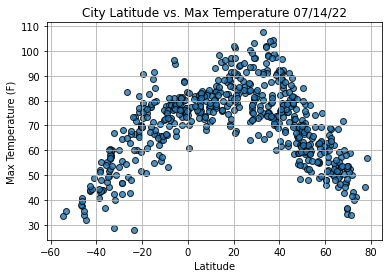

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

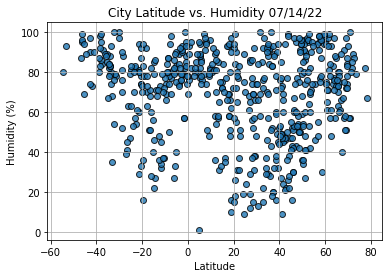

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

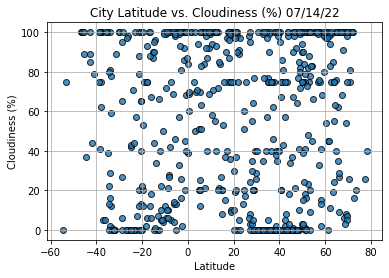

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

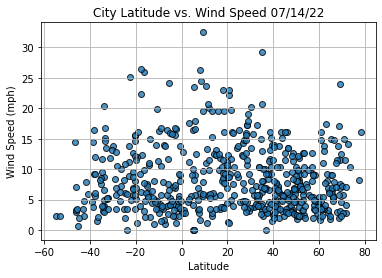

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2022-07-14 20:08:40
Lat                       70.6333
Lng                      147.9167
Max Temp                    52.65
Humidity                       57
Cloudiness                     81
Wind Speed                   5.66
Name: 13, dtype: object

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Ilulissat,GL,2022-07-14 20:08:37,69.2167,-51.1000,46.99,51,8,7.58
5,Nanortalik,GL,2022-07-14 20:08:38,60.1432,-45.2371,47.88,75,100,5.39
8,Jamestown,US,2022-07-14 20:08:39,42.0970,-79.2353,78.03,48,0,6.91
9,High Prairie,CA,2022-07-14 20:06:59,55.4334,-116.4858,69.42,46,100,9.93
10,Bilibino,RU,2022-07-14 20:04:31,68.0546,166.4372,50.56,57,6,2.98


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

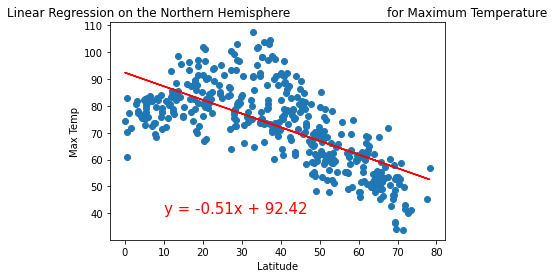

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

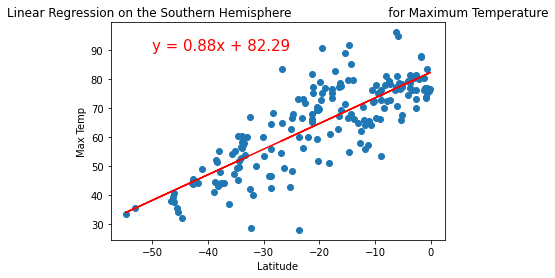

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

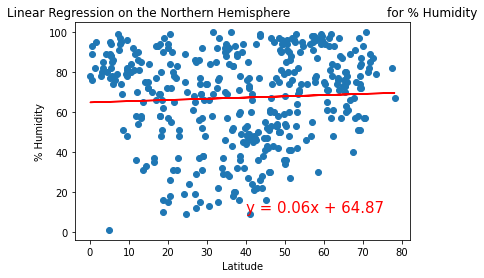

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

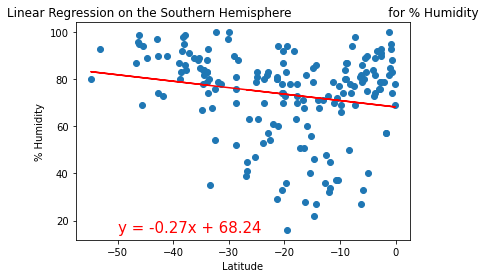

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

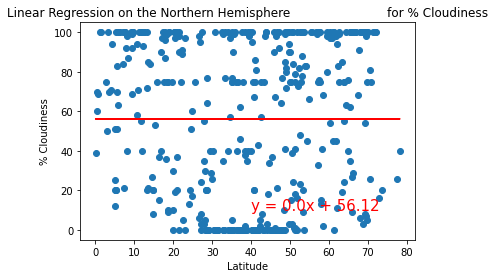

In [44]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

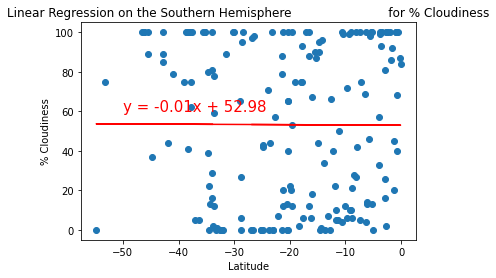

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

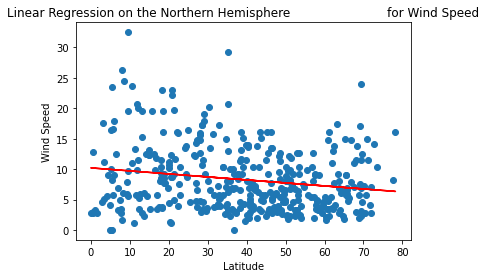

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

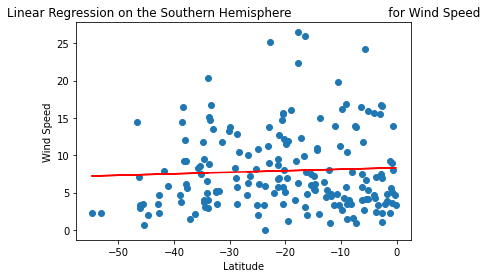

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))